In [20]:
from hrv import calculate_HRV_metrics,process_HRV_files
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import warnings
# FutureWarning may occur in the pd.concat method. it doesn't affect the running of this code,so ignore it
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
# create a file list based on file column in 'fantasia_individuals.csv'
file_list = pd.read_csv('fantasia_individuals.csv')
file_list = pd.DataFrame(file_list)
# modify the path to ensure that python can find the right path of these files
file_list['file'] = "investigating_hrv_dataset/" + file_list['file']
file_list = file_list['file']

fantasia = process_HRV_files(file_list, 'fantasia.csv')

In [18]:
# load data in 'fantasia.csv' and 'fantasia_individuals.csv' into fantasia_data and indvd_data respectively
fantasia_data = pd.read_csv('fantasia.csv')
hrv_df = pd.DataFrame(fantasia_data)
indvd_data = pd.read_csv('fantasia_individuals.csv')
indvd_data = pd.DataFrame(indvd_data)
# merge age sex from 'fantasia_individuals.csv' to hrv_df
hrv_df = pd.merge(hrv_df,indvd_data[['file','age','sex']],left_on='filename',right_on='file',how='right')
# rename the sex to gender in hrv_df
hrv_df.rename(columns={'sex':'gender'},inplace=True)

In [19]:
hrv_df

,filename,mean_nn,mean_bpm,sdnn,rmssd,pnn20,pnn50,file,age,gender
0,o01.csv,1011,59.3,48.0,15.5,13.0,0.6,o01.csv,77,F
1,o02.csv,1062,56.5,33.7,26.5,12.8,0.6,o02.csv,73,F
2,o03.csv,1004,59.8,47.9,28.4,27.1,3.3,o03.csv,73,M
3,o04.csv,1163,51.6,116.3,119.0,40.4,12.7,o04.csv,81,M
4,o05.csv,1088,55.1,43.2,12.6,6.0,0.1,o05.csv,76,M
5,o06.csv,1168,51.4,23.9,25.1,24.7,0.8,o06.csv,74,F
6,o07.csv,1012,59.3,50.7,47.4,33.7,5.3,o07.csv,68,M
7,o08.csv,850,70.6,43.8,26.1,32.7,3.5,o08.csv,73,F
8,o09.csv,1470,40.8,94.4,102.6,68.5,36.2,o09.csv,71,M
9,o10.csv,880,68.2,57.3,21.1,27.8,2.0,o10.csv,71,F


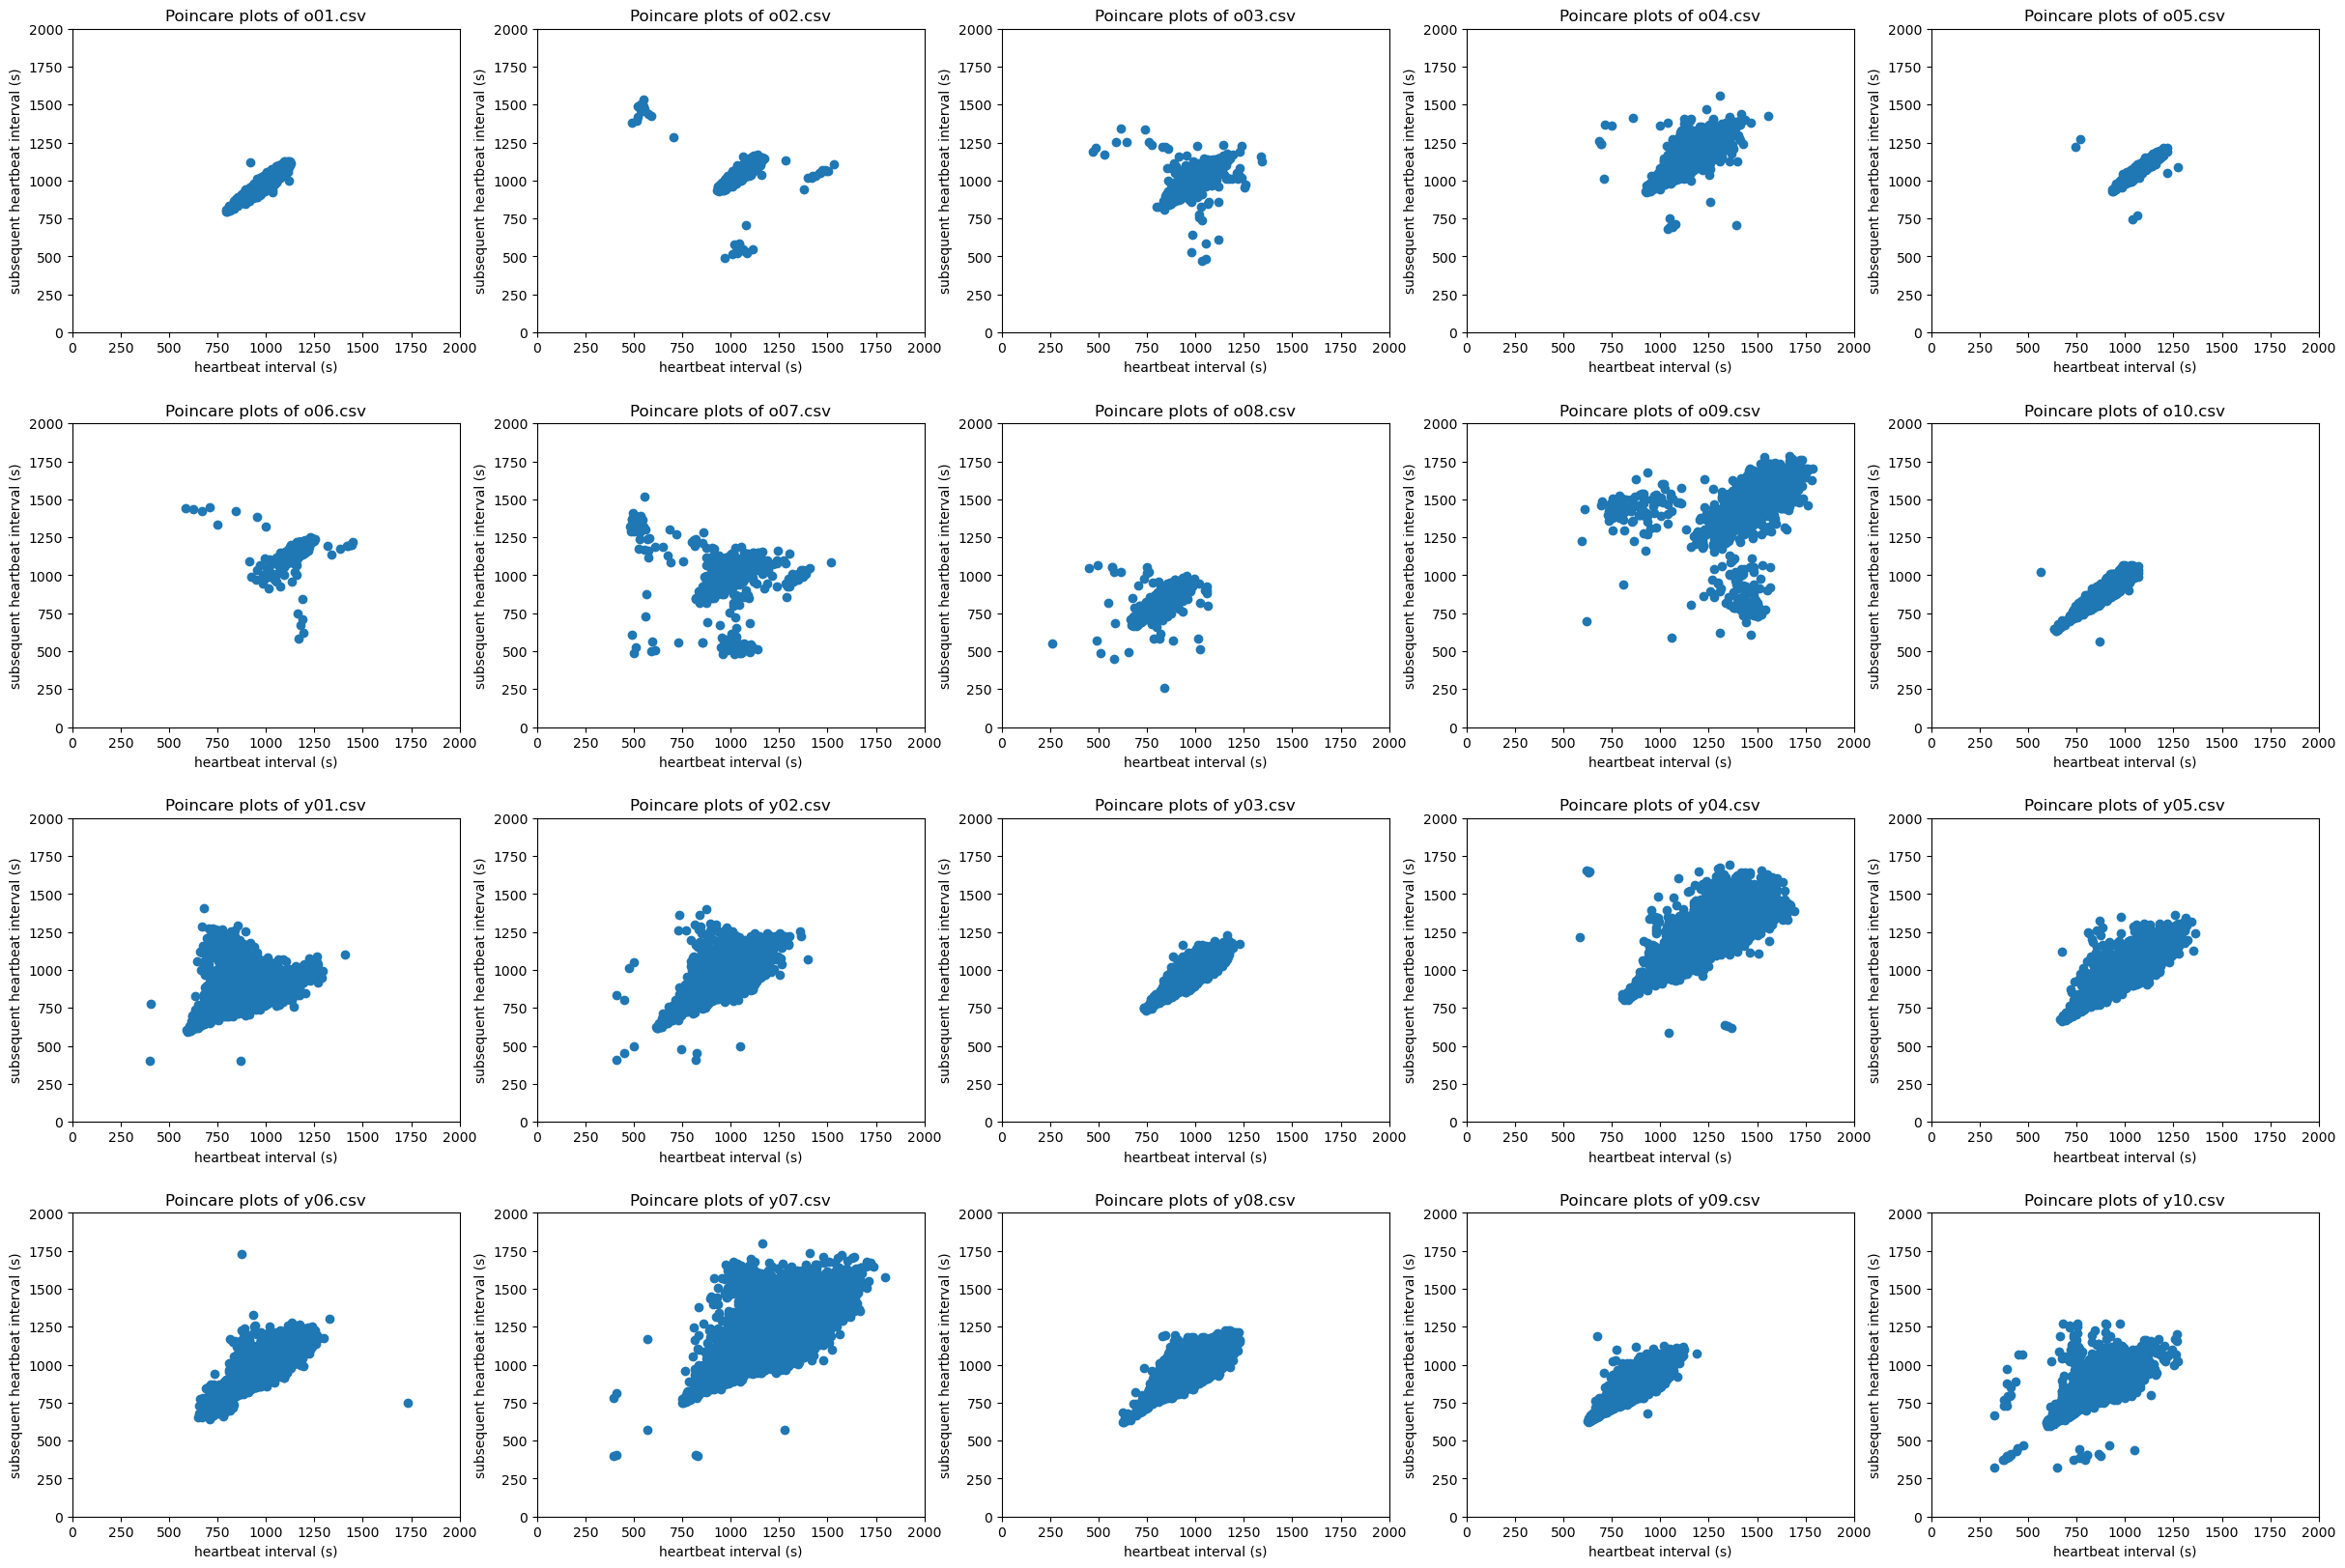

In [70]:
fig,axs = plt.subplots(4,5,figsize = (30,20))

for i,file in enumerate(file_list):
    try:
        if os.path.exists(file):
            data = pd.read_csv(file)
            df = pd.DataFrame(data)
            df['time_next'] = df['time'].shift(-1)
            df['rr'] = df['time_next'] - df['time']
            df['rr_next'] = df['rr'].shift(-1)
            axs[i//5][i % 5].scatter(df['rr'],df['rr_next'])
            axs[i//5][i % 5].set_xlim(0,2000)
            axs[i//5][i % 5].set_ylim(0,2000)
            axs[i//5][i % 5].set_title(f'Poincare plots of {file.split("/")[1]}')
            axs[i//5][i % 5].set_xlabel('heartbeat interval (s)')
            axs[i//5][i % 5].set_ylabel('subsequent heartbeat interval (s)')
        else:
            raise FileNotFoundError
    except FileNotFoundError:
        print(f"File '{file}' does not exist")
        
fig.subplots_adjust(hspace=0.3)
plt.show() 




In [78]:
import pandas as pd
import numpy as np


age_groups = [ 20, 30, 40, 60,80, np.inf]
labels = ['20-30','30-40','40-50','60-70','Above 70']
hrv_df['age_group'] = pd.cut(hrv_df['age'], bins=age_groups, labels=labels)
hrv_df

,filename,mean_nn,mean_bpm,sdnn,rmssd,pnn20,pnn50,file,age,gender,age_group
0,o01.csv,1011,59.3,48.0,15.5,13.0,0.6,o01.csv,77,F,60-70
1,o02.csv,1062,56.5,33.7,26.5,12.8,0.6,o02.csv,73,F,60-70
2,o03.csv,1004,59.8,47.9,28.4,27.1,3.3,o03.csv,73,M,60-70
3,o04.csv,1163,51.6,116.3,119.0,40.4,12.7,o04.csv,81,M,Above 70
4,o05.csv,1088,55.1,43.2,12.6,6.0,0.1,o05.csv,76,M,60-70
5,o06.csv,1168,51.4,23.9,25.1,24.7,0.8,o06.csv,74,F,60-70
6,o07.csv,1012,59.3,50.7,47.4,33.7,5.3,o07.csv,68,M,60-70
7,o08.csv,850,70.6,43.8,26.1,32.7,3.5,o08.csv,73,F,60-70
8,o09.csv,1470,40.8,94.4,102.6,68.5,36.2,o09.csv,71,M,60-70
9,o10.csv,880,68.2,57.3,21.1,27.8,2.0,o10.csv,71,F,60-70


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

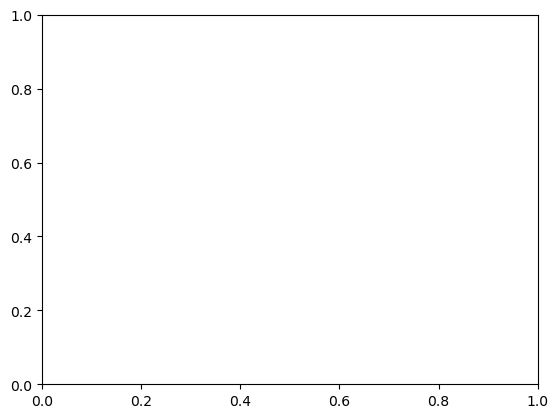

In [79]:
plt.boxplot()